# Phase 1: Understanding the Dataset


# Data Preparation


o Load the dataset into a pandas DataFrame.

o Display the first few rows to familiarize yourself with the structure
and contents.


In [21]:
import pandas as pd

data = pd.read_csv("/content/Synthetic_Financial_datasets_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [22]:
data.shape

(1048575, 11)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [24]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


# Phase 2: Data Cleaning and Exploration


# Initial Review

o Check for missing or inconsistent values.

o Remove or handle columns that are irrelevant for fraud detection.
Justify your choice.


In [26]:
#dfCol = data.drop(columns=['nameOrig', 'nameDest'], inplace = True)


In [27]:
data.dropna(inplace=True)

In [28]:
data.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


# Exploratory Analysis


o Calculate the total number of transactions and categorize them by
type.


In [29]:
print("Total transactions : ", len(data))

Total transactions :  1048575


In [30]:
print("Type of transaction : ",data['type'].value_counts())

Type of transaction :  type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


o Identify the percentage of fraudulent transactions and compare
them across transaction types

In [31]:
print("Fraud Percentage:", data['isFraud'].mean() * 100)

Fraud Percentage: 0.10890971079798775


In [32]:
print("Type of fraud : ", data[data['isFraud'] == 1]['type'].value_counts())

Type of fraud :  type
CASH_OUT    578
TRANSFER    564
Name: count, dtype: int64


In [33]:
print("Percentage of fraudulent transactions", (data[data['isFraud'] == 1]['type'].value_counts() / data['type'].value_counts() * 100))


Percentage of fraudulent transactions type
CASH_IN          NaN
CASH_OUT    0.154694
DEBIT            NaN
PAYMENT          NaN
TRANSFER    0.650122
Name: count, dtype: float64


o Examine the distribution of transaction amounts (mean, median,
standard deviation) for both fraudulent and non-fraudulent
transactions.


In [34]:
print("Fraudulent and NON-Fraudulent transactions")
grouped = data.groupby('isFraud')['amount']
print("Mean:", grouped.mean())
print("Median:", grouped.median())
print("Standard deviation:", grouped.std())

Fraudulent and NON-Fraudulent transactions
Mean: isFraud
0    1.575397e+05
1    1.192629e+06
Name: amount, dtype: float64
Median: isFraud
0     76214.97
1    353179.45
Name: amount, dtype: float64
Standard deviation: isFraud
0    2.541883e+05
1    2.030599e+06
Name: amount, dtype: float64


# Phase 3: Real-Life Fraud Detection Analysis


# Detecting Suspicious Patterns


In [35]:
data['isFlaggedFraud'] = (data['amount'] > 200000).astype(int)

print("Transactions flagged :", data['isFlaggedFraud'].sum())


Transactions flagged : 283371


In [44]:
fraud = data[data['isFraud'] == 1]

print(f"Fraud by type: {fraud['type'].value_counts()}")

print(f"Time steps for fraud: {fraud['step'].value_counts()}")

print("Average:", fraud['amount'].mean())
print("Median:", fraud['amount'].median())
print("Max:", fraud['amount'].max())
print("Min:", fraud['amount'].min())


Fraud by type: type
CASH_OUT    578
TRANSFER    564
Name: count, dtype: int64
Time steps for fraud: step
66    24
22    23
6     22
34    22
74    22
      ..
29     4
49     4
54     4
76     4
23     2
Name: count, Length: 95, dtype: int64
Average: 1192628.9320753065
Median: 353179.44999999995
Max: 10000000.0
Min: 119.0


## Group Analysis

In [39]:
tCount = data['type'].value_counts()
tSum = data.groupby('type')['amount'].sum()

print("Transaction count by type:\n", tCount)
print("\nTotal transaction value by type:\n", tSum)


Transaction count by type:
 type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64

Total transaction value by type:
 type
CASH_IN     3.859476e+10
CASH_OUT    6.876474e+10
DEBIT       4.219599e+07
PAYMENT     3.936097e+09
TRANSFER    5.503644e+10
Name: amount, dtype: float64


In [41]:
fraud = data[data['isFraud'] == 1]

origFraud = fraud['nameOrig'].value_counts()
origFraud = origFraud[origFraud > 1]

destFraud = fraud['nameDest'].value_counts()
destFraud = destFraud[destFraud > 1]

print("origFraud repeatedly involved in fraud:")
print(origFraud)

print("\nnameDest repeatedly involved in fraud:")
print(destFraud)


origFraud repeatedly involved in fraud:
Series([], Name: count, dtype: int64)

nameDest repeatedly involved in fraud:
nameDest
C935310781     2
C1013511446    2
C1827219533    2
C104038589     2
C1981613973    2
C200064275     2
C410033330     2
C52390890      2
C803116137     2
C185805228     2
Name: count, dtype: int64


# Data Visualization

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

This plot visualizes the count of fraudulent transactions by type, highlighting which transaction types are most associated with fraud.

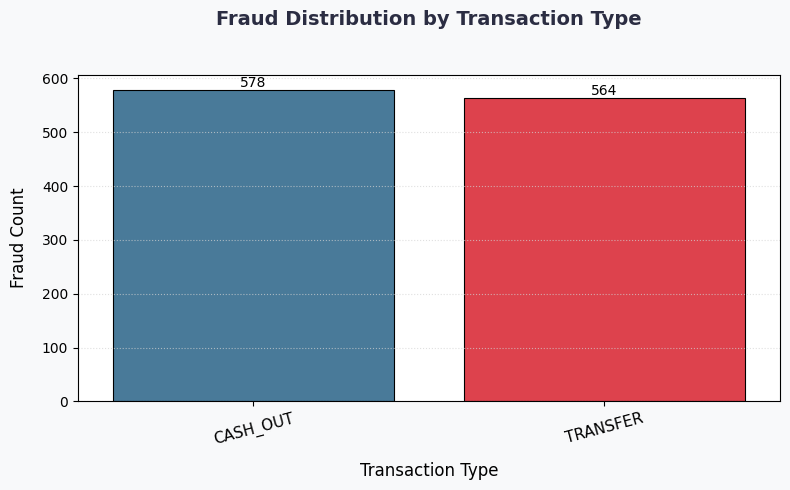

In [52]:
plt.figure(figsize=(8,5), facecolor='#f8f9fa')
ax = plt.gca()
ax.set_facecolor('#ffffff')

unique_types = fraud['type'].value_counts().index
palette = sns.color_palette(['#e63946', '#457b9d'])[:len(unique_types)]

sns.countplot(data=fraud, x='type', order=unique_types,
             palette=palette, hue='type', legend=False,
             edgecolor='black', linewidth=0.8, saturation=0.9)

plt.title('Fraud Distribution by Transaction Type\n',
         fontsize=14, fontweight='bold', pad=20, color='#2b2d42')
plt.xlabel('Transaction Type', fontsize=12, labelpad=10)
plt.ylabel('Fraud Count', fontsize=12, labelpad=10)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
               (p.get_x() + p.get_width()/2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points',
               fontsize=10)

plt.xticks(fontsize=11, rotation=15)
plt.yticks(fontsize=10)
ax.grid(axis='y', linestyle=':', color='lightgray', alpha=0.7)

plt.tight_layout()
plt.show()

This plot shows how fraudulent transactions are distributed across different time steps, revealing periods with higher fraud activity.

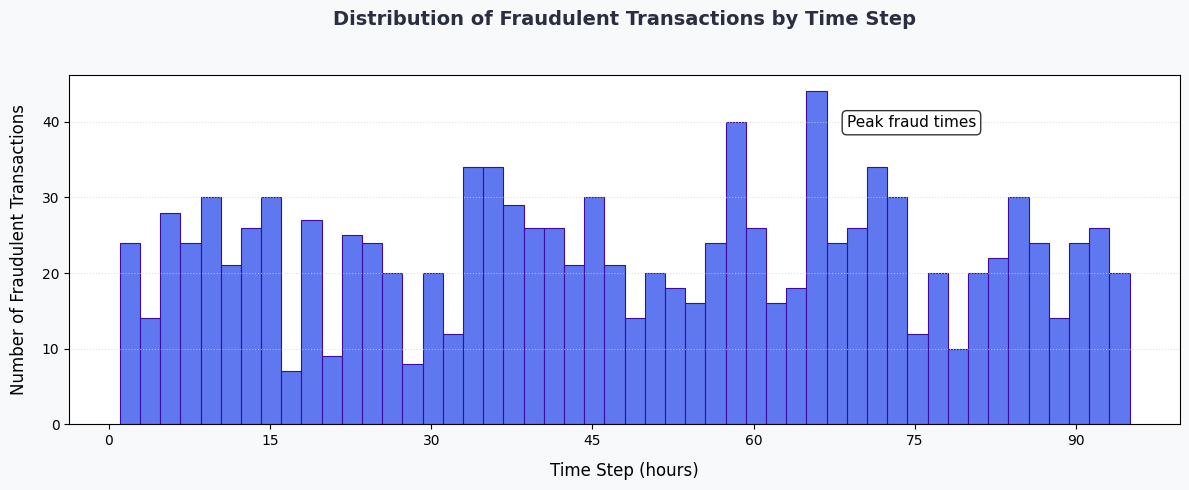

In [50]:
plt.figure(figsize=(12,5), facecolor='#f8f9fa')
ax = plt.gca()
ax.set_facecolor('#ffffff')

hist = sns.histplot(fraud['step'], bins=50, kde=False,
                   color='#4361ee', edgecolor='#3a0ca3',
                   linewidth=0.8, alpha=0.85)

plt.title('Distribution of Fraudulent Transactions by Time Step\n',
         fontsize=14, fontweight='bold', pad=20, color='#2b2d42')
plt.xlabel('Time Step (hours)', fontsize=12, labelpad=10)
plt.ylabel('Number of Fraudulent Transactions', fontsize=12, labelpad=10)

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10)

ax.grid(axis='y', linestyle=':', color='lightgray', alpha=0.7)

plt.annotate('Peak fraud times', xy=(0.7, 0.85), xycoords='axes fraction',
            fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

This plot illustrates the distribution of fraudulent transaction amounts, showing that most are relatively small, with a few high-value outliers skewing the average.

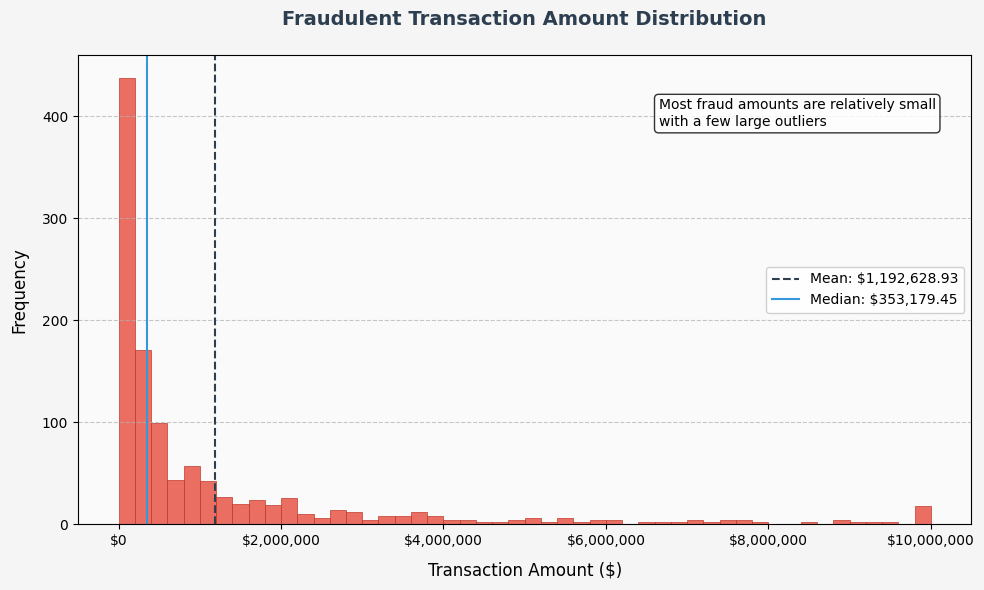

In [49]:
plt.figure(figsize=(10, 6), facecolor='#f5f5f5')
ax = plt.gca()
ax.set_facecolor('#fafafa')

hist = sns.histplot(fraud['amount'], bins=50, color='#e74c3c',
                    edgecolor='#c0392b', linewidth=0.5, alpha=0.8)

mean_val = fraud['amount'].mean()
median_val = fraud['amount'].median()
plt.axvline(mean_val, color='#2c3e50', linestyle='--', linewidth=1.5, label=f'Mean: ${mean_val:,.2f}')
plt.axvline(median_val, color='#3498db', linestyle='-', linewidth=1.5, label=f'Median: ${median_val:,.2f}')

plt.title('Fraudulent Transaction Amount Distribution\n',
          fontsize=14, fontweight='bold', color='#2c3e50')
plt.xlabel('Transaction Amount ($)', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)

ax.xaxis.set_major_formatter('${x:,.0f}')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=10, framealpha=0.9)

plt.annotate('Most fraud amounts are relatively small\nwith a few large outliers',
             xy=(0.65, 0.85), xycoords='axes fraction',
             fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()